## Constructing co-expression graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_Loading expression data for selected mice._

In [2]:
expression_data_all_features = pd.read_pickle("processed_data/expression_standardized_cleaned.pkl")

In [3]:
expression_data_all_features

strain,Nmt1_10338077_Muscle_CD,Psmb5_10338095_Muscle_CD,Hdac5_10338098_Muscle_CD,Dlg1_10338109_Muscle_CD,Wars_10338116_Muscle_CD,Psph_10338122_Muscle_CD,Copa_10338123_Muscle_CD,Tbl3_10338144_Muscle_CD,Hb1bp3_10338180_Muscle_CD,Aup1_10338221_Muscle_CD,...,AFFX-r2-P1-cre-3_AFFX-r2-P1-cre-5_at_Eye,AFFX-ThrX-3_AFFX-ThrX-3_at_Eye,AFFX-ThrX-5_AFFX-ThrX-5_at_Eye,AFFX-ThrX-M_AFFX-ThrX-M_at_Eye,Tfrc_AFFX-TransRecMur-X57349_3_at_Eye,Tfrc_AFFX-TransRecMur-X57349_5_at_Eye,Tfrc_AFFX-TransRecMur-X57349_M_at_Eye,AFFX-TrpnX-3_AFFX-TrpnX-3_at_Eye,AFFX-TrpnX-5_AFFX-TrpnX-5_at_Eye,AFFX-TrpnX-M_AFFX-TrpnX-M_at_Eye
B6D2F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.945871,-0.383660,-1.764515,-1.513057,0.618771,1.036264,1.008312,-0.810138,-0.336536,-0.813993
BXD1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.414755,0.599324,0.185117,1.277075,-0.501507,-0.566462,-0.427261,-0.273595,-2.101328,1.004035
BXD100,-0.725161,0.007720,0.376058,0.545516,-1.104466,-0.273818,-0.901318,-0.509151,-0.924874,0.986363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD101,-1.317918,1.462562,0.845329,0.515211,-1.058281,-0.056781,-0.942842,-0.953912,0.496976,0.299762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BXD98,2.220295,-1.073020,0.193564,0.252363,1.052343,-1.433933,-0.207268,1.668022,0.450924,-0.547979,...,-0.644823,-0.666892,0.167393,-0.138813,-0.566410,-0.740733,-0.645876,-0.672170,-1.854257,0.509659
BXD99,-1.305697,0.207241,1.453644,0.255455,-0.748846,0.607248,-0.625478,1.101311,-1.224210,-0.611035,...,-0.056785,0.899217,-0.612460,-0.721825,-0.826021,-0.757874,0.082841,-0.610851,1.463552,1.673835
C57BL.6J,-1.929009,-0.557591,-0.353919,-0.014195,0.050143,-1.273739,-0.064899,-0.132540,-0.677345,2.506693,...,1.535355,-0.017124,-1.285969,-2.491685,0.734467,0.979126,0.822489,-1.086075,-0.830678,-0.112298
D2B6F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.563092,2.631934,0.185117,-2.366754,0.130589,0.744860,0.724112,-0.518872,0.192902,-1.196735


_As we can observe we have 86 strains (mice) and 1,201,231 expression features._

_Loading the relevant features for our task._

In [4]:
selected_features_df = pd.read_pickle("processed_data/selected_features.pkl")

In [5]:
selected_features = list(selected_features_df.columns)

In [6]:
print('The total number of selected features is {f}'.format(f = len(selected_features)))

The total number of selected features is 1982


_We now select the relevant features for all the available strains._

In [7]:
expression_data = expression_data_all_features[selected_features].T

In [8]:
expression_data.index.name = 'snp'

In [9]:
expression_data

,B6D2F1,BXD1,BXD100,BXD101,BXD102,BXD11,BXD12,BXD13,BXD14,BXD15,...,BXD9,BXD90,BXD93,BXD94,BXD95,BXD98,BXD99,C57BL.6J,D2B6F1,DBA.2J
snp,,,,,,,,,,,,,,,,,,,,,
Fbxl10_ILM101990402_Bone_Femur,NaN,0.866690,NaN,NaN,NaN,-0.005025,0.900543,1.010565,-0.732865,0.866690,...,0.993639,NaN,NaN,NaN,NaN,NaN,NaN,1.450655,NaN,-0.021952
_TC1900000083.mm.1_ScWAT_HFD,NaN,NaN,1.456326,-0.172749,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.405474,NaN,NaN,-0.244974,-1.280198,0.288689,-3.362685,NaN,1.151376
1700010C24Rik_1460477_at_B_Brain_INIA,0.317242,0.104278,NaN,NaN,NaN,0.740807,1.711438,0.667642,-1.741298,0.534012,...,NaN,1.267666,NaN,NaN,NaN,NaN,NaN,1.208744,0.192147,-0.175888
B230319C09Rik_ILM100610086_Bone_Femur,NaN,0.553531,NaN,NaN,NaN,-0.932458,0.281807,-0.312588,0.646936,-0.389011,...,-0.788105,NaN,NaN,NaN,NaN,NaN,NaN,0.680901,NaN,-0.575821
E330037G11Rik_1458743_at_B_Brain_INIA,-0.265524,0.566380,NaN,NaN,NaN,1.126218,0.318977,1.079759,-1.884306,0.113554,...,NaN,1.695909,NaN,NaN,NaN,NaN,NaN,0.370094,1.169452,0.497110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr223_ILM6350097_Bone_Femur,NaN,-0.475954,NaN,NaN,NaN,0.119570,-1.384129,0.968192,0.082350,-1.190584,...,2.047580,NaN,NaN,NaN,NaN,NaN,NaN,0.506661,NaN,-0.498286
Fbp3_ILM6840577_Bone_Femur,NaN,-0.400647,NaN,NaN,NaN,-1.641554,-0.591556,1.126622,-1.695247,-0.317125,...,-0.173943,NaN,NaN,NaN,NaN,NaN,NaN,-0.687010,NaN,0.434578
Rragc_1415749_a_at_A_Brain_INIA,-0.439863,0.357356,NaN,NaN,NaN,-1.684781,-2.363398,-0.005909,0.530152,1.401987,...,NaN,-0.752074,NaN,NaN,NaN,NaN,NaN,-0.220595,0.035326,1.216100


_In order to build our co-expression graph, given two SNPs X and Y:_
- _we first obtain the vectors corresponding to the expression for all strains for those SNPS._
- _we then compute the number of common strains for these two SNPs X and Y, call it **n**._
- _we then compute the euclidian distance **e** between the non NaN values of X and Y._
- _we obtain the distance **d** between X and Y by computing d = e / n._

_We will first visualize the distribution of number of common mice measurement per pair of SNPs. With this distribution we can then set the distance to infinity between X and Y if they don't share at least n common measurements._

In [11]:
def compute_common_mice_per_snp_pair(expression_data):
    
    rows = []
    
    for index_i, row_i in expression_data.iterrows():
        
        new_row = {}
    
        for index_j, row_j in expression_data.iterrows():

                u = row_i.values
                v = row_j.values
                u_valid_indexes = np.argwhere(~np.isnan(u))
                v_valid_indexes = np.argwhere(~np.isnan(v))
                valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
                n = len(valid_indexes)
                
                new_row[index_j] = n
                
        rows.append(new_row)
    
    return pd.DataFrame(rows, index = expression_data.index)

In [12]:
count = compute_common_mice_per_snp_pair(expression_data)
count

,Fbxl10_ILM101990402_Bone_Femur,_TC1900000083.mm.1_ScWAT_HFD,1700010C24Rik_1460477_at_B_Brain_INIA,B230319C09Rik_ILM100610086_Bone_Femur,E330037G11Rik_1458743_at_B_Brain_INIA,Clns1a_1436935_x_at_A_Brain_INIA,Pgrmc1_ILM4150692_Bone_Femur,AW011738_TC0400002108.mm.1_ScWAT_CD,Gm428_ILM104200438_Bone_Femur,Gnmt_ILM106860053_Bone_Femur,...,Trit1_1424489_a_at_A_Brain_INIA,Higd1c_ILM106660736_Bone_Femur,Oxct2a_1418272_at_A_Brain_INIA,Aadac_ILM6590632_Bone_Femur,Nars2_1435707_at_B_Brain_INIA,Olfr223_ILM6350097_Bone_Femur,Fbp3_ILM6840577_Bone_Femur,Rragc_1415749_a_at_A_Brain_INIA,9130404D14Rik_1443730_at_B_Brain_INIA,Zfp406_1443775_x_at_B_Brain_INIA
snp,,,,,,,,,,,,,,,,,,,,,
Fbxl10_ILM101990402_Bone_Femur,32,2,26,32,26,26,32,2,32,32,...,26,32,26,32,26,32,32,26,26,26
_TC1900000083.mm.1_ScWAT_HFD,2,38,12,2,12,12,2,38,2,2,...,12,2,12,2,12,2,2,12,12,12
1700010C24Rik_1460477_at_B_Brain_INIA,26,12,43,26,43,43,26,13,26,26,...,43,26,43,26,43,26,26,43,43,43
B230319C09Rik_ILM100610086_Bone_Femur,32,2,26,32,26,26,32,2,32,32,...,26,32,26,32,26,32,32,26,26,26
E330037G11Rik_1458743_at_B_Brain_INIA,26,12,43,26,43,43,26,13,26,26,...,43,26,43,26,43,26,26,43,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr223_ILM6350097_Bone_Femur,32,2,26,32,26,26,32,2,32,32,...,26,32,26,32,26,32,32,26,26,26
Fbp3_ILM6840577_Bone_Femur,32,2,26,32,26,26,32,2,32,32,...,26,32,26,32,26,32,32,26,26,26
Rragc_1415749_a_at_A_Brain_INIA,26,12,43,26,43,43,26,13,26,26,...,43,26,43,26,43,26,26,43,43,43


_We then apply a mask in order to count each pair once._

In [13]:
mask = np.zeros_like(count.values, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

In [14]:
common_mice_per_pair = count.values[mask]

In [15]:
common_mice_per_pair

array([32,  2, 38, ..., 43, 43, 43])

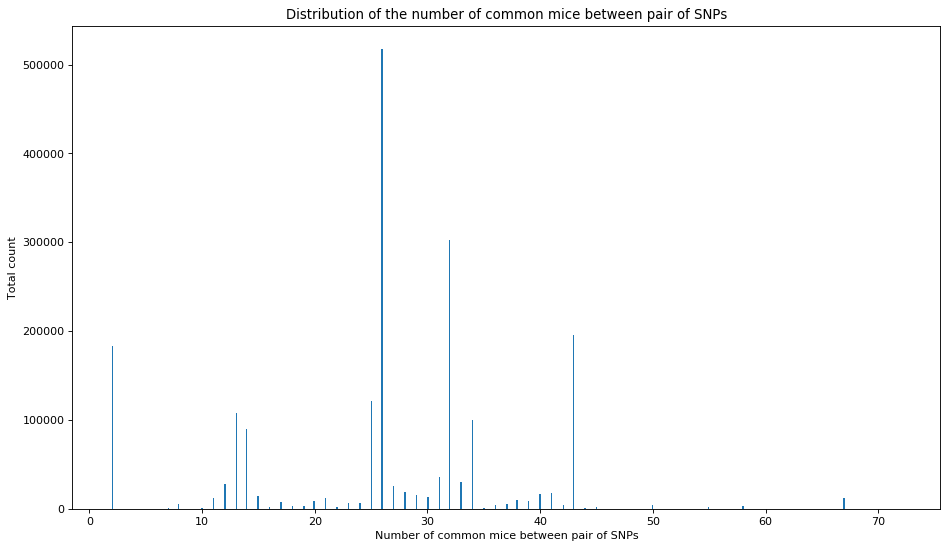

In [16]:
plt.figure(figsize = (14, 8), dpi = 80)
plt.hist(common_mice_per_pair, bins='auto')
plt.title('Distribution of the number of common mice between pair of SNPs')
plt.xlabel('Number of common mice between pair of SNPs')
plt.ylabel('Total count')
plt.show()

We decide to consider similarity only between SNPs for which we have expression data from at least 10 mice in common.

In [19]:
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import pairwise_distances, pairwise

_Define the distance function that we are using to build the graph._

In [20]:
def distance(u, v):
    # Obtain common indexes that are non NaN for both u and v
    u_valid_indexes = np.argwhere(~np.isnan(u))
    v_valid_indexes = np.argwhere(~np.isnan(v))
    valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
    
    
    
    # Obtain valid common vectors and length of these vectors
    u_valid = u[valid_indexes]
    v_valid = v[valid_indexes]
    n = len(valid_indexes)
    # threshold on the number of mice
    if n < 10:
        distance = 99999
    else:
        distance = np.linalg.norm(u_valid-v_valid)
    return distance / n 

In [21]:
distances = pd.DataFrame(
    squareform(pdist(samples,
                    distance)),
    columns = samples.index,
    index = samples.index
)

In [22]:
distances

snp,Fbxl10_ILM101990402_Bone_Femur,_TC1900000083.mm.1_ScWAT_HFD,1700010C24Rik_1460477_at_B_Brain_INIA,B230319C09Rik_ILM100610086_Bone_Femur,E330037G11Rik_1458743_at_B_Brain_INIA,Clns1a_1436935_x_at_A_Brain_INIA,Pgrmc1_ILM4150692_Bone_Femur,AW011738_TC0400002108.mm.1_ScWAT_CD,Gm428_ILM104200438_Bone_Femur,Gnmt_ILM106860053_Bone_Femur,...,Trit1_1424489_a_at_A_Brain_INIA,Higd1c_ILM106660736_Bone_Femur,Oxct2a_1418272_at_A_Brain_INIA,Aadac_ILM6590632_Bone_Femur,Nars2_1435707_at_B_Brain_INIA,Olfr223_ILM6350097_Bone_Femur,Fbp3_ILM6840577_Bone_Femur,Rragc_1415749_a_at_A_Brain_INIA,9130404D14Rik_1443730_at_B_Brain_INIA,Zfp406_1443775_x_at_B_Brain_INIA
snp,,,,,,,,,,,,,,,,,,,,,
Fbxl10_ILM101990402_Bone_Femur,0.000000,49999.500000,0.260251,0.223333,0.248356,0.258780,0.289209,49999.500000,0.242922,0.229405,...,0.219540,0.216136,0.272545,0.282535,0.233076,0.280871,0.263453,0.270332,0.237264,0.247953
_TC1900000083.mm.1_ScWAT_HFD,49999.500000,0.000000,0.492675,49999.500000,0.505944,0.376720,49999.500000,0.285073,49999.500000,49999.500000,...,0.419091,49999.500000,0.495919,49999.500000,0.501919,49999.500000,49999.500000,0.361722,0.522504,0.442853
1700010C24Rik_1460477_at_B_Brain_INIA,0.260251,0.492675,0.000000,0.310396,0.128311,0.258707,0.249841,0.324947,0.303912,0.264727,...,0.249200,0.284563,0.168161,0.235159,0.134009,0.280390,0.295399,0.264375,0.155723,0.128488
B230319C09Rik_ILM100610086_Bone_Femur,0.223333,49999.500000,0.310396,0.000000,0.281818,0.282146,0.294995,49999.500000,0.204369,0.185910,...,0.211129,0.213939,0.260143,0.303424,0.241344,0.309975,0.279379,0.292092,0.268886,0.277596
E330037G11Rik_1458743_at_B_Brain_INIA,0.248356,0.505944,0.128311,0.281818,0.000000,0.253078,0.258871,0.303328,0.283886,0.256751,...,0.266914,0.227877,0.187531,0.232064,0.101925,0.230816,0.250769,0.247511,0.171073,0.121568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr223_ILM6350097_Bone_Femur,0.280871,49999.500000,0.280390,0.309975,0.230816,0.259469,0.195935,49999.500000,0.293761,0.289169,...,0.266076,0.260272,0.300580,0.190648,0.237134,0.000000,0.182893,0.255867,0.254100,0.241895
Fbp3_ILM6840577_Bone_Femur,0.263453,49999.500000,0.295399,0.279379,0.250769,0.212740,0.184220,49999.500000,0.299632,0.231386,...,0.245756,0.295492,0.288003,0.229635,0.228824,0.182893,0.000000,0.234746,0.254059,0.225597
Rragc_1415749_a_at_A_Brain_INIA,0.270332,0.361722,0.264375,0.292092,0.247511,0.114710,0.281635,0.528489,0.247863,0.302295,...,0.165803,0.312613,0.259074,0.270352,0.259367,0.255867,0.234746,0.000000,0.243584,0.258362


In [24]:
distances_matrix = distances.values
print('Matrix containing distances has shape {s}'.format(s = distances_matrix.shape))

Matrix containing distances has shape (1982, 1982)


In [30]:
def epsilon_similarity_graph(distances: np.ndarray, sigma=1, epsilon=0):
    """ distances (n x n): matrix containing the distance between all our data points.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    W = np.exp(- distances / (2 * sigma ** 2)) # Apply the kernel to the squared distances
    W[W<epsilon] = 0 # Cut off the values below epsilon
    np.fill_diagonal(W, 0) # Remove the connections on the diagonal
    return W

In order to find a good value for sigma, we first compute the median $L_2$ distance between data points, which will be our first estimate for sigma.

In [27]:
median_dist = np.median(distances_matrix)
median_dist

0.25958175504460984

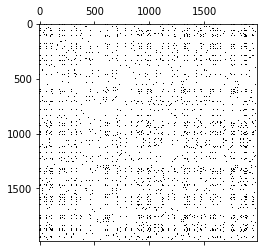

In [46]:
c = 0.7 # c is linked to the sparsity of the graph
adjacency = epsilon_similarity_graph(distances_matrix, sigma=median_dist*c, epsilon=0.1)
plt.spy(adjacency)
plt.show()

In [47]:
import networkx as nx
G = nx.from_numpy_matrix(adjacency)

In [48]:
nx.is_connected(G)

False